In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import curve_fit

In [53]:
df = pd.read_csv(r"C:\Users\GG\Downloads\Machine-Learning-TSF-Petroleum-Production-master (1)\Machine-Learning-TSF-Petroleum-Production-master\DATASET\gas.csv")

In [54]:
df['Time'] = pd.to_datetime(df['Time'])

In [55]:
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day

In [56]:
df

,Time,Production,Year,Month,Day
0,2004-05-22,10.7415,2004,5,22
1,2004-05-23,23.6240,2004,5,23
2,2004-05-24,24.2405,2004,5,24
3,2004-05-25,25.1527,2004,5,25
4,2004-05-26,24.2440,2004,5,26
...,...,...,...,...,...
5332,2018-12-27,10.7386,2018,12,27
5333,2018-12-28,10.7306,2018,12,28
5334,2018-12-29,11.1873,2018,12,29
5335,2018-12-30,10.7262,2018,12,30


In [28]:
df.iloc[(df[(df['Year']>=2014)&(df['Year']<=2016)].index)]

,Time,Production,Year,Month,Day
3511,2014-01-01,37.7533,2014,1,1
3512,2014-01-02,37.6964,2014,1,2
3513,2014-01-03,37.9503,2014,1,3
3514,2014-01-04,38.0050,2014,1,4
3515,2014-01-05,37.8158,2014,1,5
...,...,...,...,...,...
4602,2016-12-27,24.4982,2016,12,27
4603,2016-12-28,24.6220,2016,12,28
4604,2016-12-29,24.6635,2016,12,29
4605,2016-12-30,24.6261,2016,12,30


In [31]:
df.loc[(df['Year']==2017)&(df['Month']==7)&(df['Day']==15)].index

Int64Index([4802], dtype='int64')

In [33]:
df[(df['Time']>='2014-01-01')&(df['Time']<='2017-07-15')]

,Time,Production,Year,Month,Day
3511,2014-01-01,37.7533,2014,1,1
3512,2014-01-02,37.6964,2014,1,2
3513,2014-01-03,37.9503,2014,1,3
3514,2014-01-04,38.0050,2014,1,4
3515,2014-01-05,37.8158,2014,1,5
...,...,...,...,...,...
4798,2017-07-11,20.1384,2017,7,11
4799,2017-07-12,20.6121,2017,7,12
4800,2017-07-13,20.7554,2017,7,13
4801,2017-07-14,21.0778,2017,7,14


In [ ]:
df[]

In [57]:
df.tail()

,Time,Production,Year,Month,Day
5332,2018-12-27,10.7386,2018,12,27
5333,2018-12-28,10.7306,2018,12,28
5334,2018-12-29,11.1873,2018,12,29
5335,2018-12-30,10.7262,2018,12,30
5336,2018-12-31,10.7001,2018,12,31


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5337 entries, 0 to 5336
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        5337 non-null   datetime64[ns]
 1   Production  5337 non-null   float64       
 2   Year        5337 non-null   int64         
 3   Month       5337 non-null   int64         
 4   Day         5337 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 208.6 KB


In [59]:
df.describe()

,Production,Year,Month,Day
count,5337.00000,5337.000000,5337.000000,5337.000000
mean,29.70625,2011.185497,6.618887,15.752108
std,10.41884,4.222591,3.434677,8.805335
min,4.50670,2004.000000,1.000000,1.000000
25%,21.35780,2008.000000,4.000000,8.000000
50%,30.69600,2011.000000,7.000000,16.000000
75%,38.21840,2015.000000,10.000000,23.000000
max,51.66090,2018.000000,12.000000,31.000000


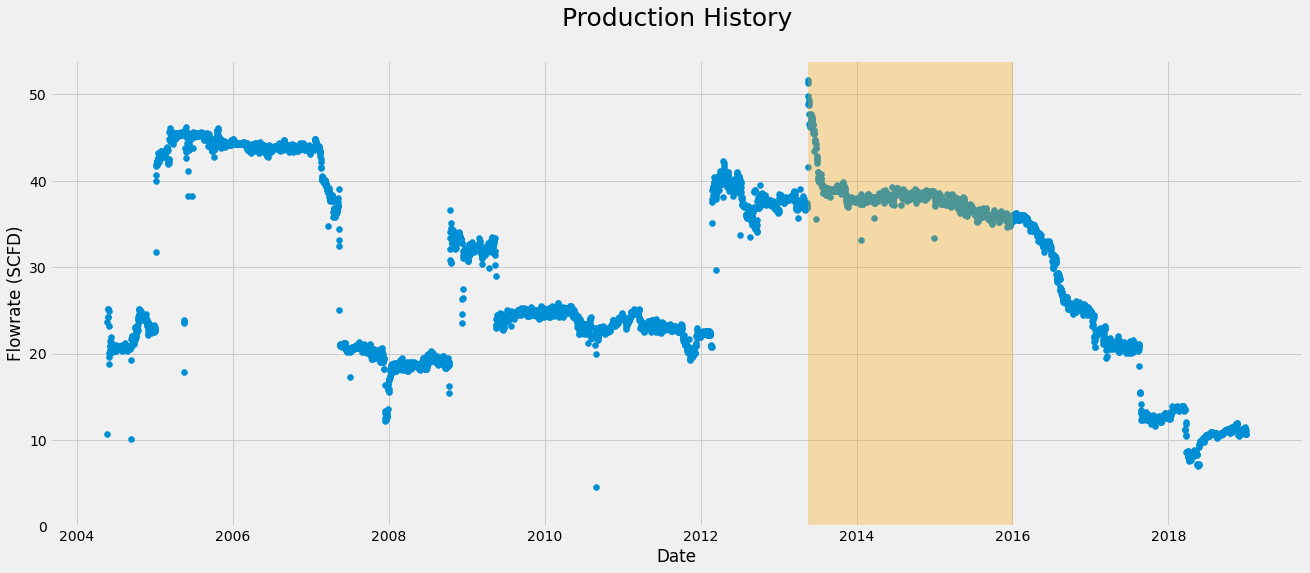

In [125]:
# Original Data
from time import strftime

plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,8))
plt.scatter(df['Time'],df['Production'])
plt.xlabel("Date")
plt.ylabel("Flowrate (SCFD)")
plt.ylim(ymin=0)
plt.title("Production History"+"\n", fontsize=25)
#Highlighting data to be analyzed for Decline Curved Analy1530"), color='orange', alpha=0.3)
plt.axvspan(strftime('2013-05-20'),strftime('2016-01-01'), color="orange", alpha=0.3)
plt.show()

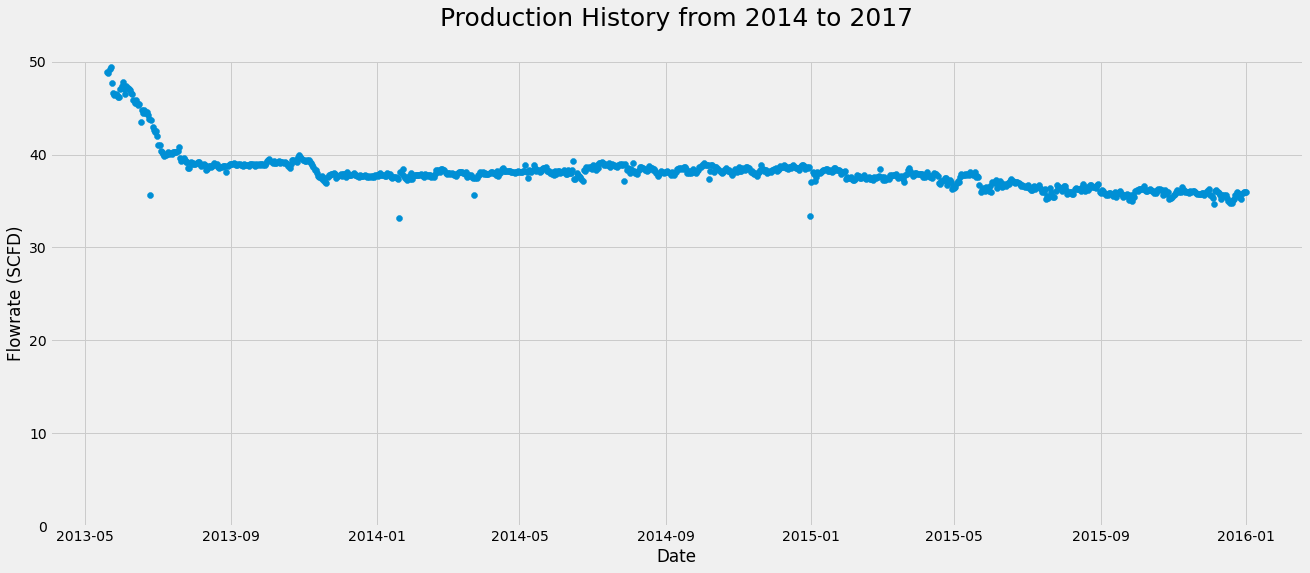

In [127]:
# Splitting Data to be Analyzed
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,8))
plt.scatter(df[(df['Time']>='2013-05-20')&(df['Time']<='2016-01-01')]['Time'],
df[(df['Time']>='2013-05-20')&(df['Time']<='2016-01-01')]['Production'])
plt.xlabel("Date")
plt.ylabel("Flowrate (SCFD)")
plt.ylim(ymin=0)
plt.title("Production History from 2014 to 2017"+"\n", fontsize=25)
plt.show()

In [128]:
t = df[(df['Time']>='2013-05-20')&(df['Time']<='2016-01-01')]['Time']
q = df[(df['Time']>='2013-05-20')&(df['Time']<='2016-01-01')]['Production']

import datetime

# subtract one datetime to another datetime
delta = [j-i for i, j in zip(t[:-1], t[1:])]
delta = np.array(delta)
delta = delta/datetime.timedelta(days=1)

# take cumulative sum over timedeltas
t = np.cumsum(delta)
t = np.append(0, t)
t = t.astype(int)

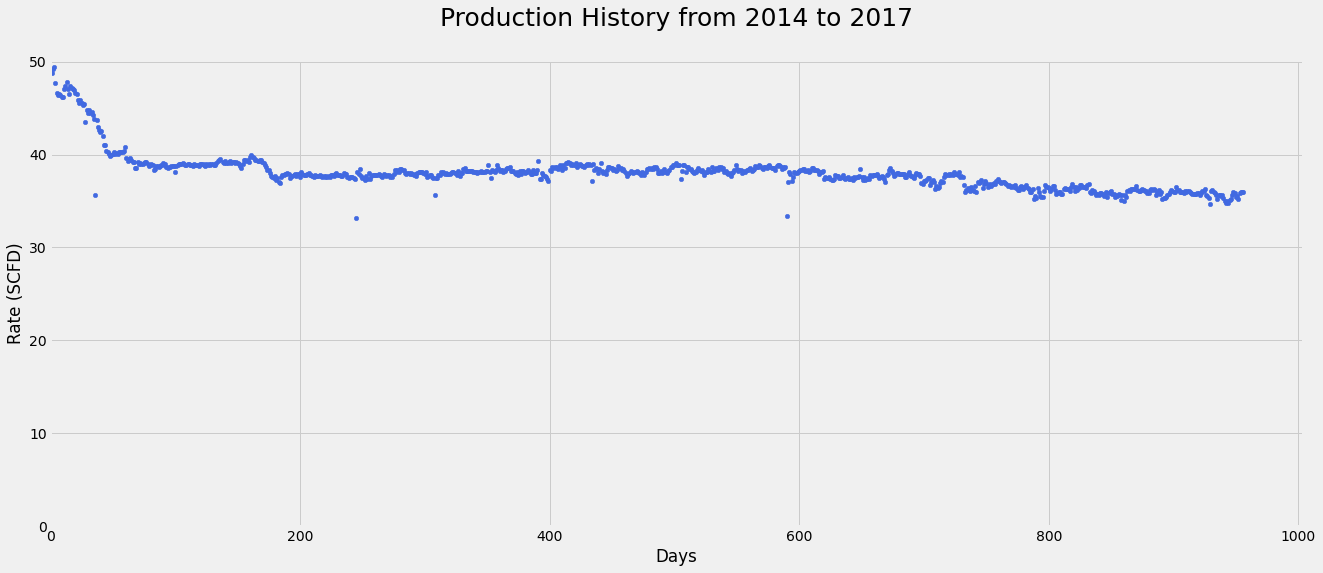

In [129]:
plt.figure(figsize=(20,8))
plt.scatter(t, q, color='royalblue', s=20)
plt.title("Production History from 2014 to 2017"+"\n", fontsize=25)
plt.xlabel('Days')
plt.ylabel('Rate (SCFD)')
plt.xlim(xmin=0); plt.ylim(ymin=0)

plt.show()

In [130]:
# normalize the time and rate data
t_normalized = t/max(t)
q_normalized = q/max(q)

In [131]:
# hyperbolic type
def hyperbolic (t,qi,di,b):
    return qi/(np.abs(1+b*di*t)**(1/b))

popt, pcov = curve_fit(hyperbolic, t_normalized, q_normalized)

In [132]:
qi, di, b = popt

# de-normalize qi and di
qi = qi * max(q)
di = di / max(t)

print('Initial production rate:', np.round(qi, 3), 'MMSCF')
print('Initial decline rate:', np.round(di, 3), 'SCF/D')
print('Decline coefficient:', np.round(b, 3))

Initial production rate: 50.976 MMSCF
Initial decline rate: 0.094 SCF/D
Decline coefficient: 22.569


In [133]:
# function for hyperbolic cumulative production
def cumpro(q_forecast, qi, di, b):
  return (((qi**b) / ((1 - b) * di)) * ((qi ** (1 - b)) - (q_forecast ** (1 - b))))  

In [136]:
# forecast gas rate until 1,500 days
t_forecast = np.arange(2000)
q_forecast = hyperbolic(t_forecast, qi, di, b)

# forecast cumulative production until 1,500 days
Qp_forecast = cumpro(q_forecast, qi, di, b)

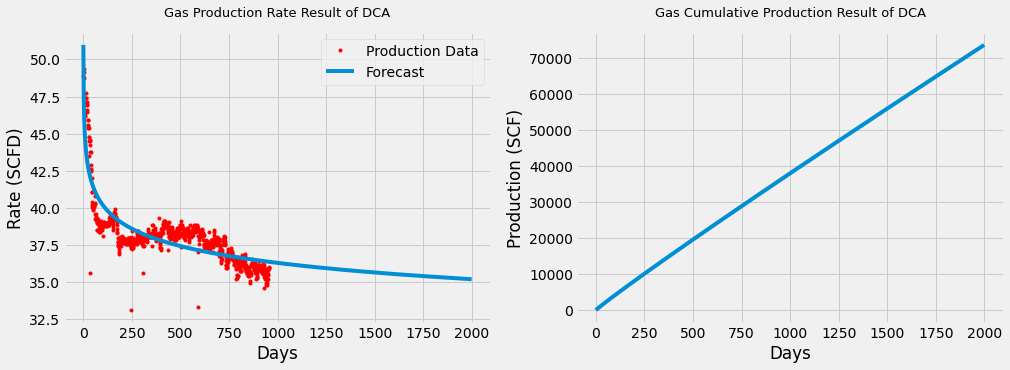

In [137]:
# plot the production data with the forecasts (rate and cum. production)
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(t, q, '.', color='red', label='Production Data')
plt.plot(t_forecast, q_forecast, label='Forecast')
plt.title('Gas Production Rate Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Rate (SCFD)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t_forecast, Qp_forecast)
plt.title('Gas Cumulative Production Result of DCA', size=13, pad=15)
plt.xlabel('Days')
plt.ylabel('Production (SCF)')

plt.show()